<a href="https://colab.research.google.com/github/sankavi03/Fruits360-cnn-classifier/blob/main/Fruits_360_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fruits-360/fruits-360-100x100.git

fatal: destination path 'fruits-360-100x100' already exists and is not an empty directory.


In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

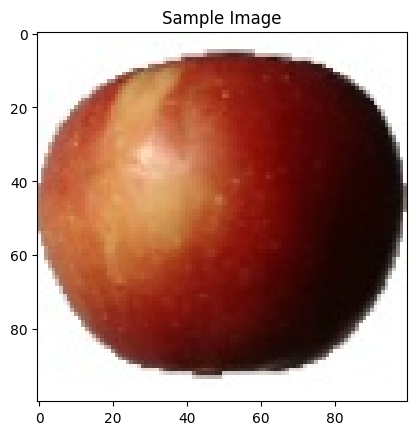

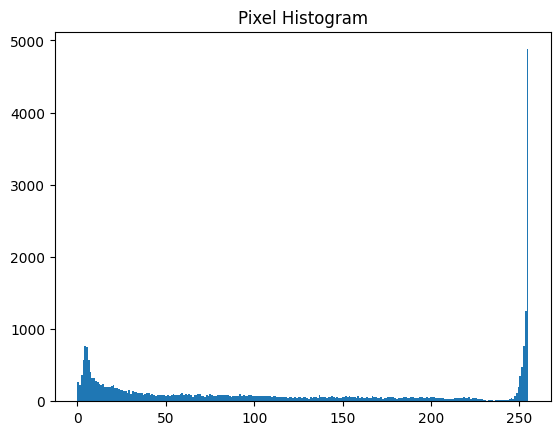

In [3]:
img = cv2.imread('/content/fruits-360-100x100/Test/Apple Braeburn 1/321_100.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Sample Image")
plt.show()

plt.hist(img.ravel(), bins=256)
plt.title("Pixel Histogram")
plt.show()

In [4]:
data = []
labels = []

path = '/content/fruits-360-100x100/Training'

for fruit in os.listdir(path):
    fruit_path = os.path.join(path, fruit)
    for img_name in os.listdir(fruit_path)[:50]:   # limit images
        img = cv2.imread(os.path.join(fruit_path, img_name))
        img = cv2.resize(img, (100,100))
        data.append(img)
        labels.append(fruit)

data = np.array(data)/255.0
labels = np.array(labels)

print("Data loaded:", data.shape)

Data loaded: (12516, 100, 100, 3)


In [5]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_cat = to_categorical(labels_encoded)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import numpy as np

# safer: compute number of classes from labels
num_classes = len(np.unique(labels))   # labels must exist

model = Sequential()

# Input layer
model.add(Input(shape=(100,100,3)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 251)            │        32,379 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385,467 (16.73 MB)

 Trainable params: 4,385,467 (16.73 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print(model)

<Sequential name=sequential, built=True>


In [8]:
history = model.fit(data, labels_cat, epochs=5, batch_size=16)

Epoch 1/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2342 - loss: 3.8360
Epoch 2/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8775 - loss: 0.4247
Epoch 3/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9341 - loss: 0.2235
Epoch 4/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9598 - loss: 0.1326
Epoch 5/5
783/783 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9604 - loss: 0.1295


In [9]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


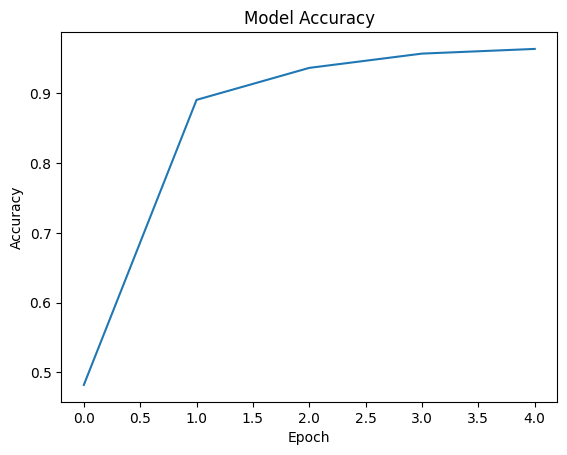

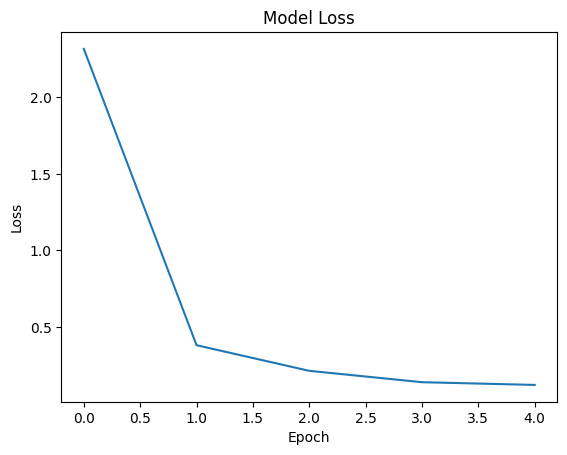

In [10]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [12]:
img = cv2.imread('/content/fruits-360-100x100/Test/Apple Braeburn 1/321_100.jpg')
img = cv2.resize(img,(100,100))/255.0
img = np.expand_dims(img,axis=0)

prediction = model.predict(img)
print("Predicted:", le.inverse_transform([np.argmax(prediction)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
Predicted: ['Apple Braeburn 1']


In [13]:
img = cv2.imread('/content/fruits-360-100x100/Test/Avocado Green 1/r0_119_100.jpg')
img = cv2.resize(img,(100,100))/255.0
img = np.expand_dims(img,axis=0)

prediction = model.predict(img)
print("Predicted:", le.inverse_transform([np.argmax(prediction)]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted: ['Avocado Green 1']


In [14]:
loss, acc = model.evaluate(data, labels_cat)
print("Accuracy:", acc)

392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0839
Accuracy: 0.9753915071487427


In [16]:
model.save("fruit_classifier.keras")